In [1]:
# Import necessary modules

%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

LOG.propagate = False

In [357]:
# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

2024-03-27 17:27:29,583 | INFO     |: Looking for Artemis Nano Peripheral Device: c0:89:c5:6d:2f:4b
2024-03-27 17:27:34,280 | INFO     |: Connected to c0:89:c5:6d:2f:4b


In [5]:
yaw = []
ref_angle = []
motor_PWM = []
motor_left_PWM = []
motor_right_PWM = []
tof_reading = []    # Stores the sensor reading in millimeters
pid_ctrl = []
timestamp = []      # Timestamps in milliseconds

def notification_handler(uuid, byte_array):
    yaw.append(((float) (ble.bytearray_to_string(byte_array).split(", ")[0])))
    ref_angle.append(((int) (ble.bytearray_to_string(byte_array).split(", ")[1])))
    motor_PWM.append(((int) (ble.bytearray_to_string(byte_array).split(", ")[2])))
    motor_left_PWM.append(((int) (ble.bytearray_to_string(byte_array).split(", ")[3])))
    motor_right_PWM.append(((int) (ble.bytearray_to_string(byte_array).split(", ")[4])))
    tof_reading.append(((int) (ble.bytearray_to_string(byte_array).split(", ")[5])))
    pid_ctrl.append(((float) (ble.bytearray_to_string(byte_array).split(", ")[6])))
    timestamp.append(((float) (ble.bytearray_to_string(byte_array).split(", ")[-1])))

ble.start_notify(ble.uuid['RX_STRING'], notification_handler)

In [358]:
ble.start_notify(ble.uuid['RX_STRING'], notification_handler)

In [359]:
ble.send_command(CMD.KP_SET, "1.5")
ble.send_command(CMD.KI_SET, "0.005")
ble.send_command(CMD.KD_SET, "500")

In [360]:
ble.send_command(CMD.MOTOR_PMW_SET, "0")
ble.send_command(CMD.REF_ANGLE_SET, "0")

In [361]:
yaw.clear()
ref_angle.clear()
motor_PWM.clear()
motor_left_PWM.clear()
motor_right_PWM.clear()
tof_reading.clear()
pid_ctrl.clear()
timestamp.clear()

ble.send_command(CMD.START_MOTOR_CTRL, "")
ble.send_command(CMD.START_IMU_PID, "")

In [362]:
ble.send_command(CMD.MOTOR_PMW_SET, "200")

In [363]:
ble.send_command(CMD.REF_ANGLE_SET, "180")

In [364]:
ble.send_command(CMD.STOP_MOTOR_CTRL, "")
ble.send_command(CMD.STOP_IMU_PID, "")
ble.send_command(CMD.MOTOR_PMW_SET, "0")
ble.send_command(CMD.REF_ANGLE_SET, "0")

In [365]:
ble.send_command(CMD.GET_DATA_STUNT, "")

In [ ]:
timestamp[-1]-timestamp[0]

In [373]:
tof_reading_cm = []
for tof in tof_reading:
    tof_reading_cm.append(float(tof)*0.1)

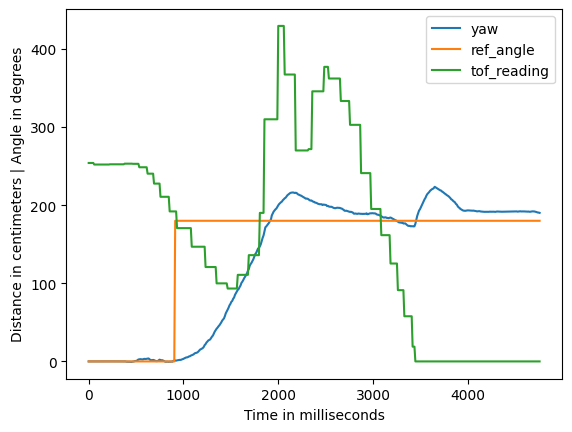

2024-03-27 17:41:45,890 | INFO     |: Disconnected from C0:89:C5:6D:2F:4B


In [374]:
data_N = len(timestamp)

# Time domain figure
time = np.linspace(0., (timestamp[-1] - timestamp[0]), num=data_N)
plt.plot(time, yaw, label='yaw')
plt.plot(time, ref_angle, label='ref_angle')
# plt.plot(time, motor_PWM, label='motor_PWM')
# plt.plot(time, motor_left_PWM, label='motor_left_PWM')
# plt.plot(time, motor_right_PWM, label='motor_right_PWM')
# plt.plot(time, tof_reading, label='tof_reading')
plt.plot(time, tof_reading_cm, label='tof_reading')
# plt.plot(time, pid_ctrl, label='pid_ctrl')
plt.legend()
plt.title('')
# plt.xlim(0, 2000)
# plt.ylim(-300, 2000)
plt.xlabel('Time in milliseconds')
plt.ylabel('Distance in centimeters | Angle in degrees')
plt.show()